<a href="https://colab.research.google.com/github/nlan082/BAINHOM/blob/main/ID_CARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import kagglehub

# Cấu hình
image_size = 64
dishes_classes = ['Chicken', 'Egg', 'Fish', 'Fruit', 'Meat', 'Rice', 'Shrimp', 'Soup', 'Soya-cake', 'Vegetable']

path = kagglehub.dataset_download("ppduyn/tnh-tin-cm")

data, labels = [], []

# Load ảnh từ thư mục
for i, dishes in enumerate(dishes_classes):
    folder = os.path.join(path, 'tính tiền cơm', dishes)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255
            data.append(img)
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(dishes_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(528, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(dishes_classes), activation='softmax')
])

# Compile và huấn luyện
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Lưu mô hình
model.save('model.h5')


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - accuracy: 0.1426 - loss: 2.5394 - val_accuracy: 0.1667 - val_loss: 2.2737
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.2041 - loss: 2.1466 - val_accuracy: 0.2500 - val_loss: 2.2000
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.3766 - loss: 1.7409 - val_accuracy: 0.3333 - val_loss: 1.8784
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.6198 - loss: 1.2064 - val_accuracy: 0.2667 - val_loss: 2.5243
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.6716 - loss: 0.9380 - val_accuracy: 0.3000 - val_loss: 2.4440
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.7629 - loss: 0.5460 - val_accuracy: 0.3167 - val_loss: 2.3537
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.9301 - loss: 0.2811 - val_accuracy: 0.3333 - val_loss: 3.1356
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9416 - loss: 0.2189 - val_accuracy: 0.


0: 480x640 5 bowls, 2981.9ms
Speed: 6.8ms preprocess, 2981.9ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Tổng tiền: 23,000 VND


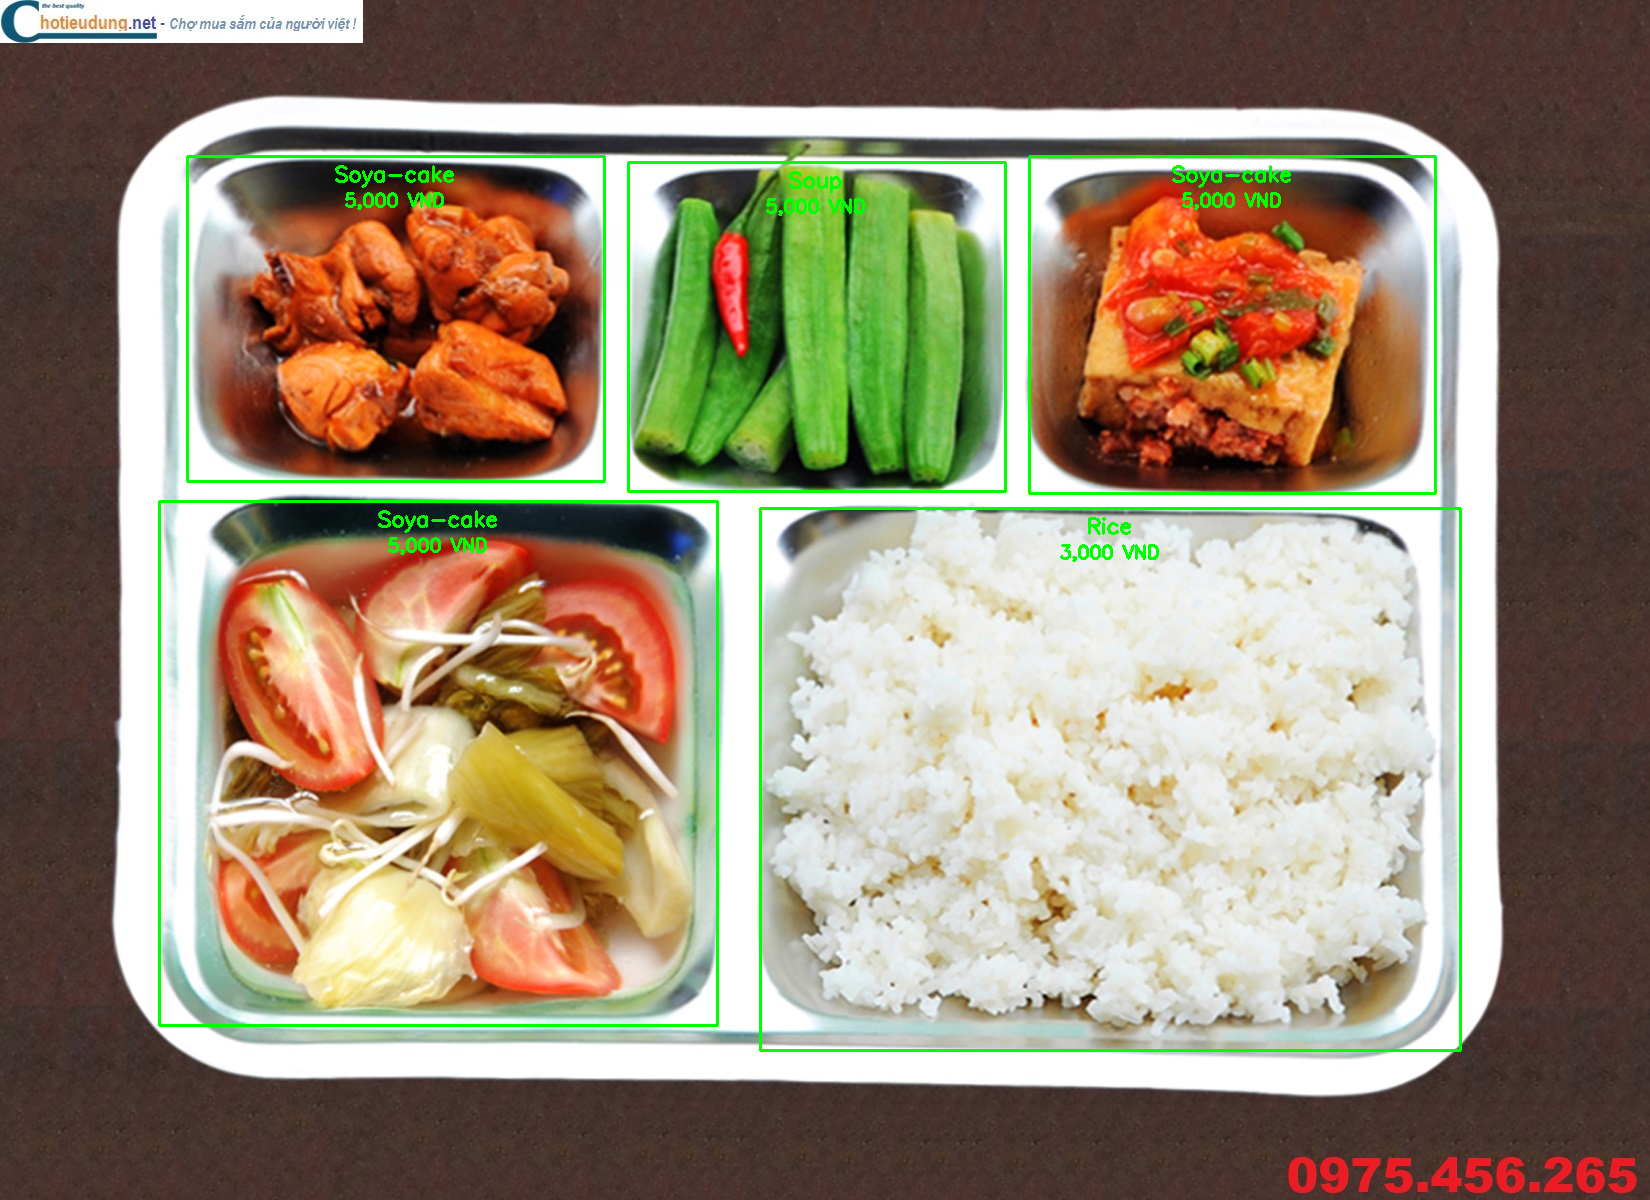

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
IMG_PATH = "/content/khay1.jpg"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
CLF_MODEL_PATH = "/content/model.h5"
yolo_model = YOLO(YOLO_MODEL_PATH)
clf_model = load_model(CLF_MODEL_PATH)
dishes_classes = ['Chicken', 'Egg', 'Fish', 'Fruit', 'Meat', 'Rice', 'Shrimp', 'Soup', 'Soya-cake', 'Vegetable']
PRICE_TABLE = {
    'Rice': 3000,
    'Chicken': 20000,
    'Fish': 15000,
    'Egg': 5000,
    'Meat': 20000,
    'Shrimp': 30000,
    'Soup': 5000,
    'Vegetable': 5000,
    'Fruit': 10000,
    'Soya-cake': 5000
}
def classify_crop(img_crop):
    if img_crop is None or img_crop.shape[0] == 0 or img_crop.shape[1] == 0:
        return "Unknown", 0.0
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255
        x = img.reshape(1, 64, 64, 3)
        preds = clf_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return dishes_classes[idx], conf
    except:
        return "Error", 0
img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    total_price = 0

    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = classify_crop(crop)
        price = PRICE_TABLE.get(label, 0)
        if label not in ["Unknown", "Error"] and conf >= 0.5:
            total_price += price
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        if label != "Unknown":
            text_label = f"{label}"
            text_price = f"{price:,} VND"
            label_size = cv2.getTextSize(text_label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
            price_size = cv2.getTextSize(text_price, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]

            label_x = x1 + (x2 - x1 - label_size[0]) // 2
            price_x = x1 + (x2 - x1 - price_size[0]) // 2
            text_y = y1 + 25
            price_y = text_y + 25
            cv2.putText(img_draw, text_label, (label_x, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
            cv2.putText(img_draw, text_price, (price_x, price_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    print(f"Tổng tiền: {total_price:,} VND")
    cv2_imshow(img_draw)


0: 512x640 4 bowls, 1 dining table, 4029.2ms
Speed: 5.3ms preprocess, 4029.2ms inference, 2.3ms postprocess per image at shape (1, 3, 512, 640)
Tổng tiền: 43,000 VND


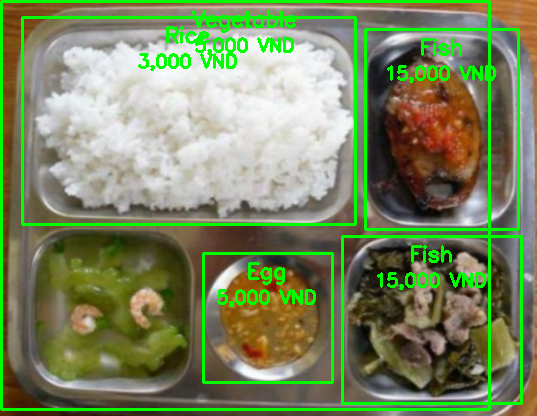

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
IMG_PATH = "/content/khay4.png"
YOLO_MODEL_PATH = "/content/yolov8x.pt"
CLF_MODEL_PATH = "/content/model.h5"
yolo_model = YOLO(YOLO_MODEL_PATH)
clf_model = load_model(CLF_MODEL_PATH)
dishes_classes = ['Chicken', 'Egg', 'Fish', 'Fruit', 'Meat', 'Rice', 'Shrimp', 'Soup', 'Soya-cake', 'Vegetable']
PRICE_TABLE = {
    'Rice': 3000,
    'Chicken': 20000,
    'Fish': 15000,
    'Egg': 5000,
    'Meat': 20000,
    'Shrimp': 30000,
    'Soup': 5000,
    'Vegetable': 5000,
    'Fruit': 10000,
    'Soya-cake': 5000
}
def classify_crop(img_crop):
    if img_crop is None or img_crop.shape[0] == 0 or img_crop.shape[1] == 0:
        return "Unknown", 0.0
    try:
        img = cv2.resize(img_crop, (64, 64))
        img = img.astype('float32') / 255.0
        x = img.reshape(1, 64, 64, 3)
        preds = clf_model.predict(x, verbose=0)
        idx = np.argmax(preds)
        conf = float(np.max(preds))
        return dishes_classes[idx], conf
    except:
        return "Error", 0.0
img = cv2.imread(IMG_PATH)
if img is None:
    print("Không đọc được ảnh.")
else:
    img_draw = img.copy()
    total_price = 0

    results = yolo_model(img)[0]
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        label, conf = classify_crop(crop)
        price = PRICE_TABLE.get(label, 0)
        if label not in ["Unknown", "Error"] and conf >= 0.5:
            total_price += price
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
        if label != "Unknown":
            text_label = f"{label}"
            text_price = f"{price:,} VND"
            label_size = cv2.getTextSize(text_label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
            price_size = cv2.getTextSize(text_price, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]

            label_x = x1 + (x2 - x1 - label_size[0]) // 2
            price_x = x1 + (x2 - x1 - price_size[0]) // 2
            text_y = y1 + 25
            price_y = text_y + 25
            cv2.putText(img_draw, text_label, (label_x, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
            cv2.putText(img_draw, text_price, (price_x, price_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    print(f"Tổng tiền: {total_price:,} VND")
    cv2_imshow(img_draw)